# Лабораторная работа №5
## Вариант №19

### Решить для n=10000 методом релаксации систему уравнений с относительной точностью 0.001 
### $x_1=1$
$x_{i-1}-(4+{sin(i+1)\over{i^2}})x_i+x_{i+1}=-4+\int_{0}^{1}{cos(3t)\over{1+10it^2}}dt$  ,$i=\overline{2,n-1}$

$x_n=4$

### Для вычесления интеграла с относительной точностью 0.01 использовать формулу Буля.

## Теоретическая справка:
### Метод релаксации применим для систем вида $Ax=b$ система линейных уровнений относительно неизвестного вектора $x\in{R^n}$ с симметричной, положительно определенной матрицей $A$ размера $n\times n$.Обозначим через $D$ диагональную матрицу $n\times n$ такую, что ее главная диагональ совпадает с главной диагональю матрицы $A$. Через $L$ обозначим нижнюю треугольную матрицу $n\times n$ такую, что ее ненулевые (поддиагональные) элементы также совпадают с элементами $A$, а главная диагональ является нулевой. Аналогично обозначим через $R$ верхнюю треугольную матрицу $n\times n$, ненулевые (наддиагональные) элементы которой совпадают с элементами $A$, а главная диагональ также является нулевой. В этом случае для  $A$ справедливо представление в виде $A=L+D+R$.
### Метод релаксации является представителем стационарных одношаговых итерационных методов линейной алгебры и записывается в виде: $${(D+{\omega}L)(x^{s+1}-x^s)\over{\omega}}+Ax^s=b$$
### Здесь $x^{(s)}$ – приближение, полученное на итерации с номером $s$, $x^{(s+1)}$ – следующее приближение, $\omega$ – число (параметр метода), матрицы $A$, $L$, $D$ и вектор $b$ определены выше.
### Необходимым условием сходимости метода релаксации с любого начального приближения $x^{(0)}$ к точному решению задачи $x^*$ является выполнение условия $\omega \in (0,2)$. Если же матрица $A$ симметрична и положительно определена, то выполнение данного условия является также и достаточным. При этом если $\omega \in (0,1)$, то говорят о методе нижней релаксации , а при $\omega \in (1,2)$ - о методе верхней релаксации , при $\omega =1$ метод релаксации будет совпадать с известным методом Зейделя.


### Явная формула для отыскания компонент нового вектора $x^{(s+1)}$:
$a_{ii}x^{s+1}_i={\omega}\sum_{j=1}^{i-1}a_{ii}x^{s+1}_i+(1-{\omega})a_{ii}x^{s}_i-{\omega}\sum_{j=j+1}^{n}a_{ii}x^{s}_i+{\omega}b_i$

### Вычисление интеграла проводим с помощью квадратурной формулы Буля $n=4$: $\sum_{k=0}^{4}C^{4}_kf(x^{4}_k)={(b-a)\over{90}}(7f(a)+32f({3a+b\over{4}})+12f({a+b\over{2}})+32f({a+3b\over{4}})+7f(b))$


In [2]:
import numpy as np
from numpy import*
import matplotlib.pyplot as plt
from math import cos
from pylab import *


#### Определяем номер итерации при котором достигается заданная точность 0.01 и вычисляем значение интеграла для фиксированного i=2

In [17]:
L=[]
a=0
b=1
N=1
g=1
k=-1
def f(t):
    return( cos(3*t)/(1+20*t*t))
while abs((g-k)/g)>0.01:
    h=(b-a)/N
    g=k
    k=0
    for i in range (0,N):
        ai=a+i*h
        bi=ai+h
        z=(h/90)*(7*f(ai)+32*f((3*ai+bi)/4)+12*f((ai+bi)/2)+32*f((ai+3*bi)/4)+7*f(bi))
        k=k+z 
    N=N+1
    L.append(k)
print(k,N-1)
print(L)



0.187213963151 3
[0.17307528060142752, 0.18685773637885067, 0.18721396315109448]


#### График подынтегральной функции

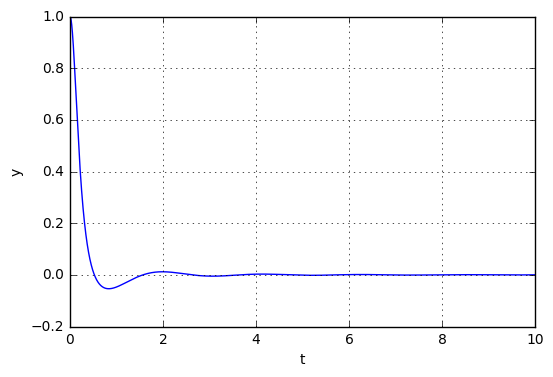

In [4]:
from numpy import *
import matplotlib.pyplot as plt
%matplotlib inline
def f(t):
    return( cos(3*t)/(1+20*t*t))
t = linspace(0, 10, 10000)
plt.xlabel('t')
plt.ylabel('y')
plt.plot(t, f(t))
plt.grid()
plt.show()    


#### График зависимости от номера итеррации

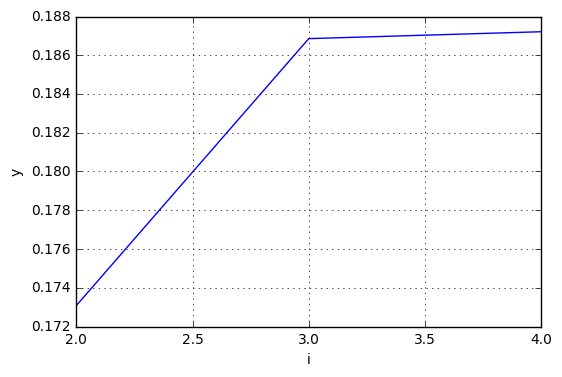

In [5]:
from numpy import *
import matplotlib.pyplot as plt
%matplotlib inline
L=[0.17307528060142752, 0.18685773637885067, 0.18721396315109448]
i=[2,3,4]
plt.xlabel('i')
plt.ylabel('y')
plt.plot(i, L, 'b')
plt.grid()
plt.show()

#### Решение интеграла с помощью формулы Буля с относительной точностью 0.01 и решение для системы из n=10000 уравнений методом релаксации с относительной точностью 0.001 

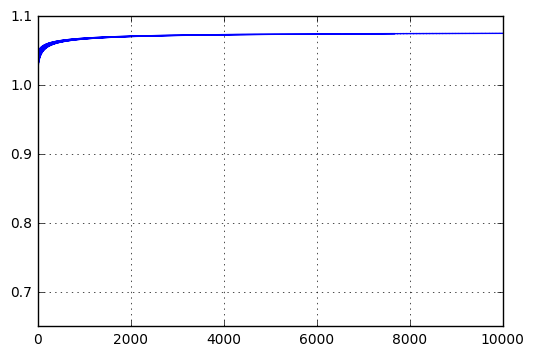

In [18]:
L=[]
w=0.85
a=0
b=1
N=10
h=(b-a)/N
k=0
for i in range(2,9999):
    k=0
    def f(t,i):
        return( cos(3*t)/(1+10*i*t*t))
    for l in range (0,10):
        al=a+l*h
        bl=al+h
        z=(h/90)*(7*f(al,i)+32*f((3*al+bl)/4,i)+12*f((al+bl)/2,i)+32*f((al+3*bl)/4,i)+7*f(bl,i))
        k=k+z
        L.append(k)
        
def A(i):
    return 1
def B(i):
    return 1
def C(i):
    return -1*(4+sin(i+1)/(i*i))
def F(i):
    return -4+L[i]    

a=np.zeros((10000,10000))
b=np.zeros(10000)
d=np.zeros(10000)
x=np.zeros(10000)
for j in range(0,10000):
    for i in range(0,10000):
        if (i==j):
            a[i][j]=C(i+1)
        else:
            if (i==j+1):
                a[i][j]=A(i+1)
for i in range(0,9999):
    a[i][i+1]=B(i)            
for i in range(0,10000):
    b[i]=F(i)
for i in range(0,10000):
    d[i]=b[i]/a[i][i]
for i in range(0,10000): 
    x[i]=1
def relax(a, b):
    n = len(a)
    r = range(n)
    x = [0 for i in r]
    conv = True
    k=0
    while conv:
        p = x.copy()
        for i in r:
            var =w*sum(a[i][j] * x[j] for j in range(0,i))
            var +=w*sum(a[i][j] * p[j] for j in range(i+1, 10000))
            var +=(1-w)*a[i][j]*p[j]
            x[i] = (w*b[i] - var) / a[i][i]
        k=k+1
        conv = sum((x[i]-p[i])**2 for i in r) < 0.001 
    return x
i=linspace(0,10000,10000)
plt.plot(i,relax(a, b),'b')
plt.grid()
plt.show()

### Вывод: Проделав лабораторную работу мы получили программу для решения СЛАУ n=10000 методом релаксации с заданной точность. Так же был вычислен интеграл с помошью квадратурной формулы Буля.
## Работу выполнил студент 431гр. Широков Алексей